In [1]:
# Import required libraries
import sys
import os

# Add the src directory to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from config import *

print(VITABSET_TEST_IMAGE_ROOT)
print(VITABSET_TEST_JSON)

F:/data\vitabset\test
F:/data\vitabset\test.bz2


In [2]:
import bz2
import json

# Lấy 5 mẫu từ VITABSET_TEST_JSON
samples = []
with bz2.open(VITABSET_TEST_JSON, 'rt', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 1:
            break
        samples.append(json.loads(line))

for sample in samples:
    print(sample['filename'], sample['html']['structure']['tokens'])

14356.png ['<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']


In [3]:
img_paths = [os.path.join(VITABSET_TEST_IMAGE_ROOT, sample['filename']) for sample in samples]
print(*img_paths, sep='\n')

F:/data\vitabset\test\14356.png


In [4]:
import os.path as osp
checkpoint_path = osp.abspath('../work_dirs/etv_concat_resnetex_ranger/epoch_1_7000.pth')
config_path = osp.abspath('../src/configs/etv_concat_resnetex_ranger.py')
print(f'"{checkpoint_path}"')
print(f'"{config_path}"')

"d:\BIG Projects\Python\ETV\work_dirs\etv_concat_resnetex_ranger\epoch_1_7000.pth"
"d:\BIG Projects\Python\ETV\src\configs\etv_concat_resnetex_ranger.py"


In [5]:
from inferencers.table_master_inferencer import TableMasterInferencer
inferencer = TableMasterInferencer(
    checkpoint=checkpoint_path,
    config=config_path,
    device='cuda:0'
)

results = inferencer(img_paths, batch_size=2, save_vis=False, return_vis=True, save_pred=False, return_pred=True)

print(f'Number of results: {len(results)}')

Loads checkpoint by local backend from path: d:\BIG Projects\Python\ETV\work_dirs\etv_concat_resnetex_ranger\epoch_1_7000.pth
Number of results: 2


In [6]:
print(results.keys())
for k in results.keys():
    if isinstance(results[k][0], dict):
        print(f'{k}[0]: {results[k][0].keys()}')
    else:
        print(f'{k}[0]: {len(results[k][0])} items')

dict_keys(['predictions', 'visualization'])
predictions[0]: dict_keys(['tokens', 'bboxes', 'token_score'])
visualization[0]: 105 items


In [7]:
pred = results['predictions'][0]
tokens = [p for p in pred['tokens'].split(',') if p != '<UKN>']
print(f'Tokens: {tokens}')
print(f'token_scores: {pred["token_score"]}')
bboxes = [b for b in pred['bboxes'] if b != [0.0, 0.0, 0.0, 0.0]]
print(f'Bounding boxes: {bboxes}')

Tokens: ['</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '</tr>', '

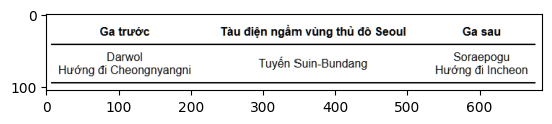

In [9]:
import matplotlib.pyplot as plt
plt.imshow(results['visualization'][0])
plt.show()